<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session11/S11_V6(LrRangeTestAndModularizeCode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Albumentation and Apex Package**

In [3]:
!pip install --no-cache-dir git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"


  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-1it6bhh0
Albumentation library is successfully installed!


## **Mount Drive and Unzip data**

In [42]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
%reload_ext autoreload
%autoreload 2

Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/API'
sys.path.append(folder)
folder = "/content/gdrive/My Drive/API/Models"
sys.path.append(folder)

## **Import required modules**

In [0]:

import torch
import train_test_loader
import show_images
from NewResnetModel import NewResnet
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms
from GradCam import GradCAM,visualize_cam
from LR_Range_Test import LR_test

## **Abumentation Transforms**

In [0]:
import albumentations as A
import cv2
channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([                                      
                                      A.PadIfNeeded(min_height=36, min_width=36, border_mode = cv2.BORDER_REFLECT, always_apply=True,),
                                      A.RandomCrop(height=32, width=32, always_apply=True),
                                      A.HorizontalFlip(p = 0.7),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                      A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=0.7) 
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


## **Load Train Test Data**

In [6]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform,batch_size=512)

Files already downloaded and verified
Files already downloaded and verified


## **Some training data**

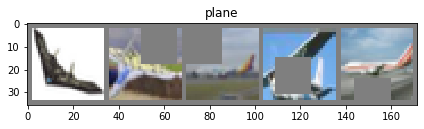

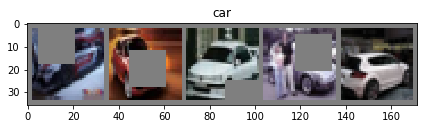

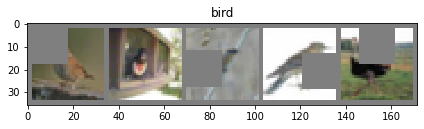

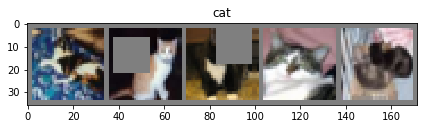

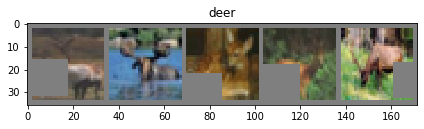

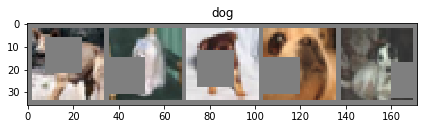

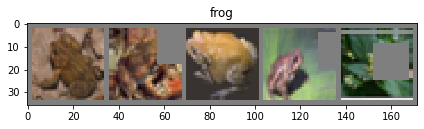

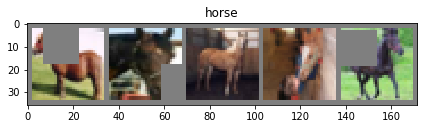

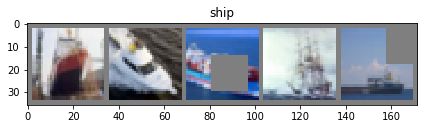

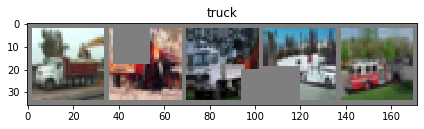

In [7]:
show_images.show_train_data(trainloader, classes)

## **Print Model Summary**

In [7]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = NewResnet().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## **Extract the best LR**

epoch = 1 Lr = 0.001  Loss=1.401229739189148 Batch_id=97 Accuracy=37.30: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]
epoch = 2 Lr = 0.0029  Loss=1.339266300201416 Batch_id=97 Accuracy=41.75: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]
epoch = 3 Lr = 0.0048  Loss=1.3393582105636597 Batch_id=97 Accuracy=43.74: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]
epoch = 4 Lr = 0.006699999999999999  Loss=1.3047436475753784 Batch_id=97 Accuracy=38.40: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]
epoch = 5 Lr = 0.0086  Loss=1.3655729293823242 Batch_id=97 Accuracy=33.89: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
epoch = 6 Lr = 0.0105  Loss=1.8434524536132812 Batch_id=97 Accuracy=20.47: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]
epoch = 7 Lr = 0.012400000000000001  Loss=1.7927236557006836 Batch_id=97 Accuracy=22.27: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
epoch = 8 Lr = 0.014300000000000002  Loss=1.866804599761963 Batch_id=97 Accuracy=19.48: 100%|██████████| 98/98 [00

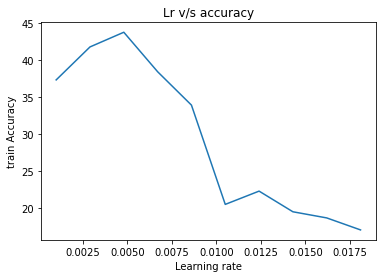

In [8]:
import torch.nn as nn
max_lr = 0.02
min_lr = 0.001
epoch = 10
criterion = nn.NLLLoss()
LR_test(max_lr, min_lr,device,epoch,model,criterion,trainloader,momemtum = 0.9,weight_decay=0.05, plot= True )

## **Initialise Loss funtion, Optimizer, Schedular**

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay=0.005 ) 
criterion = nn.NLLLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.0125, total_steps=None, epochs=24, steps_per_epoch=1, pct_start=0.25, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.8, max_momentum=0.9, div_factor=10.0,final_div_factor =1)

## **Train the Model for 50 Epochs**

In [9]:

train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,24,scheduler,best_acc = 0,path = "/content/gdrive/My Drive/API/bestmodel.pt") 

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00125


Loss=1.3603278398513794 Batch_id=97 Accuracy=38.50: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5231/10000 (52.31%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.0035000000000000005


Loss=1.038046956062317 Batch_id=97 Accuracy=53.71: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 5989/10000 (59.89%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.005750000000000001


Loss=0.9640241265296936 Batch_id=97 Accuracy=62.82: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6821/10000 (68.21%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.008


Loss=0.7284852266311646 Batch_id=97 Accuracy=67.60: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7346/10000 (73.46%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.01025


Loss=0.8985708355903625 Batch_id=97 Accuracy=72.98: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 6672/10000 (66.72%)

EPOCH: 6 LR: 0.0125


Loss=0.6861748695373535 Batch_id=97 Accuracy=73.95: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7562/10000 (75.62%)

accuracy increased, Saving model....
EPOCH: 7 LR: 0.011875


Loss=0.5845803022384644 Batch_id=97 Accuracy=78.13: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8110/10000 (81.10%)

accuracy increased, Saving model....
EPOCH: 8 LR: 0.011250000000000001


Loss=0.530028223991394 Batch_id=97 Accuracy=80.28: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8161/10000 (81.61%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.010625


Loss=0.40910735726356506 Batch_id=97 Accuracy=82.84: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7856/10000 (78.56%)

EPOCH: 10 LR: 0.01


Loss=0.45616060495376587 Batch_id=97 Accuracy=84.26: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8375/10000 (83.75%)

accuracy increased, Saving model....
EPOCH: 11 LR: 0.009375


Loss=0.3012818396091461 Batch_id=97 Accuracy=85.88: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8259/10000 (82.59%)

EPOCH: 12 LR: 0.00875


Loss=0.3577679693698883 Batch_id=97 Accuracy=87.30: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8576/10000 (85.76%)

accuracy increased, Saving model....
EPOCH: 13 LR: 0.008125


Loss=0.372043639421463 Batch_id=97 Accuracy=88.32: 100%|██████████| 98/98 [00:22<00:00,  4.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8651/10000 (86.51%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.007500000000000001


Loss=0.28517523407936096 Batch_id=97 Accuracy=89.06: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8614/10000 (86.14%)

EPOCH: 15 LR: 0.006875


Loss=0.3716723918914795 Batch_id=97 Accuracy=89.98: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8793/10000 (87.93%)

accuracy increased, Saving model....
EPOCH: 16 LR: 0.0062499999999999995


Loss=0.2918672561645508 Batch_id=97 Accuracy=90.67: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8607/10000 (86.07%)

EPOCH: 17 LR: 0.005624999999999999


Loss=0.2465522140264511 Batch_id=97 Accuracy=91.46: 100%|██████████| 98/98 [00:22<00:00,  4.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8722/10000 (87.22%)

EPOCH: 18 LR: 0.005


Loss=0.2368701547384262 Batch_id=97 Accuracy=92.01: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8853/10000 (88.53%)

accuracy increased, Saving model....
EPOCH: 19 LR: 0.004375


Loss=0.2324630618095398 Batch_id=97 Accuracy=92.75: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8889/10000 (88.89%)

accuracy increased, Saving model....
EPOCH: 20 LR: 0.00375


Loss=0.19423389434814453 Batch_id=97 Accuracy=93.19: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8943/10000 (89.43%)

accuracy increased, Saving model....
EPOCH: 21 LR: 0.0031249999999999993


Loss=0.22821027040481567 Batch_id=97 Accuracy=94.11: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8998/10000 (89.98%)

accuracy increased, Saving model....
EPOCH: 22 LR: 0.0025000000000000005


Loss=0.17112162709236145 Batch_id=97 Accuracy=94.52: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9053/10000 (90.53%)

accuracy increased, Saving model....
EPOCH: 23 LR: 0.001875


Loss=0.15032342076301575 Batch_id=97 Accuracy=95.01: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9103/10000 (91.03%)

accuracy increased, Saving model....
EPOCH: 24 LR: 0.0012499999999999994


Loss=0.10689401626586914 Batch_id=97 Accuracy=95.56: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.0005, Accuracy: 9135/10000 (91.35%)

accuracy increased, Saving model....


## **Load the Best Accuracy Model**

In [10]:

model = NewResnet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9 ,weight_decay = 0.0005)
checkpoint = torch.load("/content/gdrive/My Drive/API/bestmodel.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


model.eval()
print("Loaded the best model")

Loaded the best model


In [11]:
evaluate.evaluate_accuracy(model,device,testloader)

Accuracy of the network on the 10000 test images: 91.35 %


## **Evaluate the class wise accuracy**

In [12]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 94 %
Accuracy of   car : 96 %
Accuracy of  bird : 87 %
Accuracy of   cat : 83 %
Accuracy of  deer : 88 %
Accuracy of   dog : 85 %
Accuracy of  frog : 94 %
Accuracy of horse : 92 %
Accuracy of  ship : 94 %
Accuracy of truck : 95 %


## **Plot accurary change in test and train**

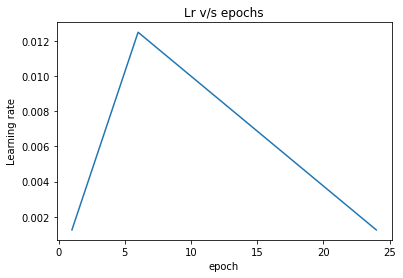

In [15]:
import matplotlib.pyplot as plt
epochs = []
for i in range(24):
  epochs.append(i+1)

plt.plot(epochs,train_test.LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()


## **Extract 25 misclassified_images**

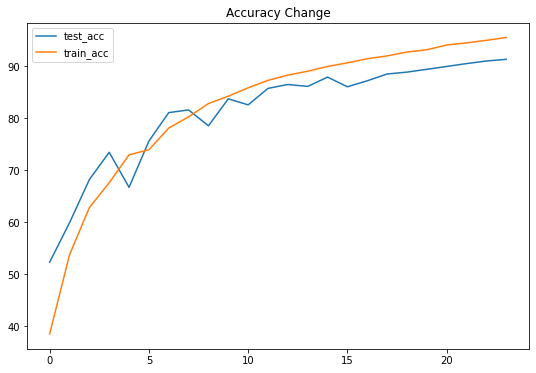

In [18]:
curves = [(train_test.test_acc,"test_acc"),(train_test.train_acc,"train_acc")]
evaluate.plot_curve(curves,"Accuracy Change",Figsize = (9,6))


## **GradCam View of misclassified images(for all 4 layers)**

In [0]:
model.eval()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


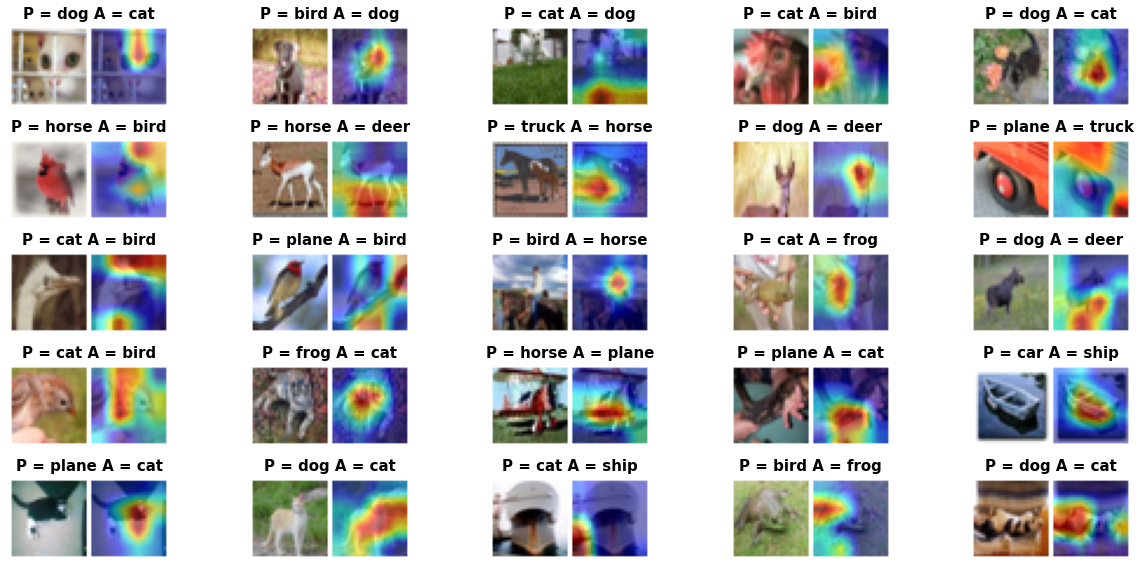

In [46]:

from GradCam import GradCamView
layers = [model.R2]
miscalssified_images = evaluate.show_misclassified_images(model, device, testloader, classes)
GradCamView(miscalssified_images,model,classes,layers,Figsize = (17,8),subplotx1 = 5, subplotx2 = 5)

